# Who are the beneficiaries of the Common Agricultural Policy in Poland?

## 1. Introduction

The Common Agricultural Policy (CAP) is one of the oldest policies of the European Union (EU). Since its very launch in 1962, it has always been the biggest expenditure item in the EU budget, though its share has been progressively falling from 80% in the 1960s to 37% today. A particularity of the CAP is that the majority of funding is directly paid to individuals and private bodies rather than channelled through programmes co-decided by state or local public authorities.

In 2013, a [regulation](https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=CELEX:32013R1306&from=en#d1382e5646-549-1) was adopted to make mandatory for Member States to publish every year the list of beneficiaries of CAP funds. The data must contain their names, municipality of residence/registration and amounts of payment broken down by so-called measure (type of payment that "rewards" specific actions). Small recipients (under 1,250 EUR per year) are also included in the data but are anonymized.

Poland is an interesting case because although its population is not the largest recipient of CAP payments – France heads the ranking since the very start of the policy –, it has the biggest number of individual beneficiairies with over 1.3 million, that is 20% of the EU total. In comparison, Poles represent 7.5% of the EU population. The following analysis aims at better understanding the profile of CAP beneficiaries in Poland and the distribution of payments.

## 2. Data collection

Despite the transparency obligation set by the regulation, it is not easy to retrieve the data in an analysis-friendly format. That is because the regulation does not impose a specific publication format and template. In Poland, the data is published by the Ministry of Agriculture and Rural Development and made accessible through an [internet search engine](http://beneficjenciwpr.minrol.gov.pl). The website does not directly offer a complete dataset file for download, however it is possible to download search results in CSV and PDF format. Wildcard characters allow retrieval of the entire dataset, but then the download function does not work, probably because the generated file is too big. I am a beginner in data science and I am not familiar yet with scraping techniques, therefore the method used here to collect the data consisted in slicing them by amount range (still faster than e.g. by municipality) and download the CSV files. We will work on the latest data available, that is relative to payments made in 2018.

At the beginning, the presence in certain rows of special characters like £ and Œ (instead of the Polish letters Ł and Ś) also blocked the CSV generation process and output incomplete files, but this was corrected in August 2019 by the administrator of the database.

According to the search engine, the total number of rows/beneficiaries is **1,361,244** and the total amount of payments is **21,094,690,622.63** PLN. This should serve as a reference for us when checking whether we have collected all the data.

## 3. Analysis

Through this analysis, we will try to answer three questions:
- what is the distribution of funding between measures?
- what is the distribution of payments?
- which individuals, legal persons and categories are the largest beneficiairies of the CAP?

We will also try to visualize the geographical distribution of funding on a map. Our analysis only concerns the year 2018.

### a) data checking and cleaning

Here we don't show the concatenating process of smaller CSV files in order not to overload memory, but for the information it was executed thanks to pandas.concat function. We start directly with the concatenated, single CSV file generated by pandas.DataFrame.to_csv.

In [1]:
# We begin by importing numpy, pandas, matplotlib and seaborn libraries and by creating a dataframe from the CSV file
# The CSV generator of the search engine uses semicolons as a separator, we have not changed this convention
# We specify the UTF-8 encoding format to make sure we will not have trouble with Polish special characters
# Because we had a DtypeWarning at the first load of the CSV file,
# we set for now the dtype of all columns on object and see later whether some dtypes will have to be changed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('cap-2018-poland.csv', sep=';', encoding='utf-8', dtype=object)
pd.set_option('float_format', '{:.2f}'.format) # displays numbers with 2 decimals max

# Let's have a quick overview of the main features of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361244 entries, 0 to 1361243
Columns: 109 entries, Rok to Suma
dtypes: object(109)
memory usage: 1.1+ GB


It seems that we have all the rows. We now have to check the total amount of payments. Let's look at the columns.

In [2]:
dataset.head()

,Rok,Imię,Nazwisko,Nazwa,Gmina,Kod pocztowy,I.1 System płatności jednolitej tytuł III,"I.2 System jednolitej płatności obszarowej Tytuł V, rozdział 2","I.3 Wsparcie dla wytwórców buraków cukrowych i trzciny cukrowej - Tytuł IV, rozdział 1, sekcja 7","I.4 Płatności z tytułu wołowiny i cielęciny - Tytuł IV, rozdział 1 sekcja 11",...,V/B.4.3 Jakość życia/różnicowanie,V/B.4.4 b) Współpraca transnarodowa i międzyregionalna,"V/B.4.5 c) Prowadzenie lokalnej grupy działania, nabywanie umiejętności i prowadzenie na terytorium aktywizacji",V/B.4.6 Art. 66 Pomoc techniczna,V/B.4.7 Dodatkowe płatności bezpośrednie w Bułgarii i Rumunii,VI/A.1 Działania informacyjne i promocyjne zapewniane w ramach rozporządzenia (WE) nr 1144/2014,VI/B.1 Działania informacyjne i promocyjne zapewniane w rozporządzeniu (WE) nr 3/2008,VI/C.1 POSEI,VI/D.1 Mniejsze wyspy Morza Egejskiego,Suma
0,2018,Małe gospodarstwo,1,NaN,ORŁY,37-716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1457,80"
1,2018,Małe gospodarstwo,100007,NaN,ŁĄCKO,33-390,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1490,01"
2,2018,Małe gospodarstwo,100047,NaN,GOSTYNIN,09-500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1426,94"
3,2018,Małe gospodarstwo,100059,NaN,ŚWIDNICA,58-112,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1480,94"
4,2018,Małe gospodarstwo,100063,NaN,ANDRESPOL,95-020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1457,80"


Column names are in Polish, we will later translate them into English and shorten them. Understanding them is very easy because measure names (starting with numbers) are the same in the whole EU and on the same website as the search engine, the ministry has published the [English version](beneficjenciwpr.minrol.gov.pl/filenames/download/28/Correction-Measures_description_Rev6_EN.pdf) of the list of measures.

We also see that most columns contain money amounts (expressed in Polish zloty PLN), therefore we will have to set the dtype to float.

As for the total amount of payments, the last column, Suma, contains the total of payments received by one beneficiary. We will sum up the column to check whether it matches the figure we have got from the search engine. For this purpose, we must first replace commas (the convention on continental Europe to write decimal numbers) with dots, then convert the column from object to float.

In [3]:
dataset['Suma'] = dataset['Suma'].str.replace(',','.').astype(float)

In [4]:
dataset['Suma'].sum()

21094690622.629997

The sum matches the amount given by the search engine. This shows that our dataset is complete. Let's now make the columns easier to work with.

In [5]:
# We inspect column names
columnnames = dataset.columns.values
print(columnnames)

['Rok' 'Imię' 'Nazwisko' 'Nazwa' 'Gmina' 'Kod pocztowy'
 'I.1 System płatności jednolitej tytuł III'
 'I.2 System jednolitej płatności obszarowej Tytuł V, rozdział 2'
 'I.3 Wsparcie dla wytwórców buraków cukrowych i trzciny cukrowej - Tytuł IV, rozdział 1, sekcja 7'
 'I.4 Płatności z tytułu wołowiny i cielęciny - Tytuł IV, rozdział 1 sekcja 11'
 'I.5 Premie z tytułu mięsa baraniego i koziego - Tytuł IV, rozdział 1, sekcja 10'
 'I.6 Płatności specjalne z tytułu bawełny - Tytuł IV, rozdział 1 sekcja 6'
 'I.7 Wsparcie specjalne - Tytuł III, rozdział 5'
 'II.1 System płatności podstawowej - Tytuł III, Sekcje 1, 2, 3 i 5'
 'II.2 System jednolitej płatności obszarowej Art. 36'
 'II.3 Płatność redystrybucyjna - Tytuł III, rozdział 2'
 'II.4 Płatność z tytułu praktyk rolnicznych korzystnych dla klimatu i środowiska - Tytuł III, rozdział 3'
 'II.5 Płatność z tytułu obszarów o ograniczeniach natualnych - Tytuł III, rozdział 4'
 'II.6 Płatność dla młodych rolników - Tytuł III, rozdział 5'
 'II.7 

In [6]:
# We create a list with shorter column names in English
newcolumnnames = ['year','firstname','familyname','legalname','municipality','postalcode']

In [7]:
# Column names for type I measures
for i in range(1,8):
    columnname = 'm1_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type II measures
for i in range(1,11):
    columnname = 'm2_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type III measures
for i in range(1,11):
    columnname = 'm3_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type IV/A measures
for i in range(1,26):
    columnname = 'm4a_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type V/B/1 measures
for i in range(1,19):
    columnname = 'm5b1_' + str(i)
    newcolumnnames.append(columnname)
    
# Column names for type V/B/2 measures
for i in range(1,14):
    columnname = 'm5b2_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type V/B/3 measures
for i in range(1,9):
    columnname = 'm5b3_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type V/B/4 measures
for i in range(1,8):
    columnname = 'm5b4_' + str(i)
    newcolumnnames.append(columnname)

# Column names for type VI measures and sum
newcolumnnames.extend(['m6_a1', 'm6_b1', 'm6_c1', 'm6_d1'])
newcolumnnames.append('sum')

In [8]:
# We check the list of new column names and whether the number of items matches the number of columns
print(len(newcolumnnames))
print(newcolumnnames)

109
['year', 'firstname', 'familyname', 'legalname', 'municipality', 'postalcode', 'm1_1', 'm1_2', 'm1_3', 'm1_4', 'm1_5', 'm1_6', 'm1_7', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'm2_5', 'm2_6', 'm2_7', 'm2_8', 'm2_9', 'm2_10', 'm3_1', 'm3_2', 'm3_3', 'm3_4', 'm3_5', 'm3_6', 'm3_7', 'm3_8', 'm3_9', 'm3_10', 'm4a_1', 'm4a_2', 'm4a_3', 'm4a_4', 'm4a_5', 'm4a_6', 'm4a_7', 'm4a_8', 'm4a_9', 'm4a_10', 'm4a_11', 'm4a_12', 'm4a_13', 'm4a_14', 'm4a_15', 'm4a_16', 'm4a_17', 'm4a_18', 'm4a_19', 'm4a_20', 'm4a_21', 'm4a_22', 'm4a_23', 'm4a_24', 'm4a_25', 'm5b1_1', 'm5b1_2', 'm5b1_3', 'm5b1_4', 'm5b1_5', 'm5b1_6', 'm5b1_7', 'm5b1_8', 'm5b1_9', 'm5b1_10', 'm5b1_11', 'm5b1_12', 'm5b1_13', 'm5b1_14', 'm5b1_15', 'm5b1_16', 'm5b1_17', 'm5b1_18', 'm5b2_1', 'm5b2_2', 'm5b2_3', 'm5b2_4', 'm5b2_5', 'm5b2_6', 'm5b2_7', 'm5b2_8', 'm5b2_9', 'm5b2_10', 'm5b2_11', 'm5b2_12', 'm5b2_13', 'm5b3_1', 'm5b3_2', 'm5b3_3', 'm5b3_4', 'm5b3_5', 'm5b3_6', 'm5b3_7', 'm5b3_8', 'm5b4_1', 'm5b4_2', 'm5b4_3', 'm5b4_4', 'm5b4_5', 'm5b4

In [9]:
# We substitute column names and check whether it worked correctly
dataset.columns = newcolumnnames
dataset.head()

,year,firstname,familyname,legalname,municipality,postalcode,m1_1,m1_2,m1_3,m1_4,...,m5b4_3,m5b4_4,m5b4_5,m5b4_6,m5b4_7,m6_a1,m6_b1,m6_c1,m6_d1,sum
0,2018,Małe gospodarstwo,1,NaN,ORŁY,37-716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1457.80
1,2018,Małe gospodarstwo,100007,NaN,ŁĄCKO,33-390,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490.01
2,2018,Małe gospodarstwo,100047,NaN,GOSTYNIN,09-500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426.94
3,2018,Małe gospodarstwo,100059,NaN,ŚWIDNICA,58-112,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1480.94
4,2018,Małe gospodarstwo,100063,NaN,ANDRESPOL,95-020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1457.80


In [10]:
# We can now turn at the content of columns
dataset.describe(include='all')

,year,firstname,familyname,legalname,municipality,postalcode,m1_1,m1_2,m1_3,m1_4,...,m5b4_3,m5b4_4,m5b4_5,m5b4_6,m5b4_7,m6_a1,m6_b1,m6_c1,m6_d1,sum
count,1361244,1352195,1352195,10974,1361211,1361244,0.00,139,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,9,0.00,0.00,1361244.00
unique,1,1791,745406,10457,2236,14536,0.00,78,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,9,0.00,0.00,nan
top,2018,Małe gospodarstwo,NOWAK,ROLNICZA SPÓŁDZIELNIA PRODUKCYJNA,WARSZAWA,22-400,nan,"0,04",nan,nan,...,nan,nan,nan,nan,nan,nan,"4417264,88",nan,nan,nan
freq,1361244,660833,3263,94,6352,3716,nan,8,nan,nan,...,nan,nan,nan,nan,nan,nan,1,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,15496.63
std,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,91759.13
min,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,2185.74
50%,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,5106.32
75%,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,...,nan,nan,nan,nan,nan,nan,NaN,nan,nan,13270.89


In [11]:
# There is only one type of value in the year column, 2018, because this is the range of our dataset
# We can delete this column
del dataset['year']

In [12]:
# Besides Suma/sum which we have already converted, all measure columns contain money amounts
# that we have to convert to float after having replaced commas with dots.
# At the same time we substitute NaN with zeros to allow further calculation.
# Grab a coffee, this step takes several minutes...
dataset.loc[:, 'm1_1':'m6_d1'] = dataset.loc[:, 'm1_1':'m6_d1'].apply(lambda x: pd.to_numeric(x.str.replace(',','.'))).fillna(0)

### b) distribution of funding by measure

In [13]:
# At this stage we are ready to calculate sums by column/measure
measuresums = dataset.loc[:, 'm1_1':'m6_d1'].sum()
print(measuresums)

m1_1               0.00
m1_2         1346639.08
m1_3               0.00
m1_4               0.00
m1_5               0.00
m1_6               0.00
m1_7           47098.77
m2_1               0.00
m2_2      5552079319.66
m2_3      1174095446.41
m2_4      3748351939.44
m2_5               0.00
m2_6       251977972.05
m2_7      2061584133.51
m2_8               0.00
m2_9      1582986684.87
m2_10      105337761.77
m3_1        29765740.30
m3_2               0.00
m3_3       114815890.92
m3_4       102069922.81
m3_5               0.00
m3_6               0.00
m3_7        12233074.77
m3_8               0.00
m3_9          445212.63
m3_10        4102284.56
m4a_1              0.00
m4a_2         210677.80
m4a_3       16277916.01
               ...     
m5b2_3             0.00
m5b2_4             0.00
m5b2_5             0.00
m5b2_6             0.00
m5b2_7             0.00
m5b2_8             0.00
m5b2_9             0.00
m5b2_10            0.00
m5b2_11            0.00
m5b2_12            0.00
m5b2_13         

In [14]:
# We saw a lot of null sums that we are going to isolate
measuresums_null = measuresums[measuresums == 0].index
print(measuresums_null)
print('Number of types of measure for which no payment was made:', len(measuresums_null))

Index(['m1_1', 'm1_3', 'm1_4', 'm1_5', 'm1_6', 'm2_1', 'm2_5', 'm2_8', 'm3_2',
       'm3_5', 'm3_6', 'm3_8', 'm4a_1', 'm4a_10', 'm4a_11', 'm4a_12', 'm4a_13',
       'm4a_17', 'm4a_19', 'm4a_20', 'm4a_21', 'm4a_22', 'm4a_23', 'm5b1_1',
       'm5b1_2', 'm5b1_4', 'm5b1_5', 'm5b1_6', 'm5b1_7', 'm5b1_8', 'm5b1_9',
       'm5b1_10', 'm5b1_11', 'm5b1_12', 'm5b1_13', 'm5b1_14', 'm5b1_15',
       'm5b1_16', 'm5b1_17', 'm5b1_18', 'm5b2_1', 'm5b2_2', 'm5b2_3', 'm5b2_4',
       'm5b2_5', 'm5b2_6', 'm5b2_7', 'm5b2_8', 'm5b2_9', 'm5b2_10', 'm5b2_11',
       'm5b2_12', 'm5b2_13', 'm5b3_1', 'm5b3_2', 'm5b3_3', 'm5b3_4', 'm5b3_5',
       'm5b3_6', 'm5b3_7', 'm5b3_8', 'm5b4_1', 'm5b4_2', 'm5b4_3', 'm5b4_4',
       'm5b4_5', 'm5b4_6', 'm5b4_7', 'm6_a1', 'm6_c1', 'm6_d1'],
      dtype='object')
Number of types of measure for which no payment was made: 71


In [15]:
# We check whether the sum of non-null measure columns matches the reference sum
measuresums_nonnull = measuresums[measuresums != 0]
measuresums_nonnull.sum()

21094690622.632496

The sums match (up to two decimals, differences observed beyond can be explained by floating point imprecision). Now we are going to calculate the share of each measure in the total and express them in percentages.

In [16]:
measuresums_nonnull_sum = measuresums_nonnull.sum()
measuresums_nonnull_share = measuresums_nonnull / measuresums_nonnull_sum * 100
print(measuresums_nonnull_share.sort_values(ascending=False))

m2_2     26.32
m2_4     17.77
m2_7      9.77
m2_9      7.50
m4a_18    6.25
m4a_4     6.02
m2_3      5.57
m4a_7     4.86
m4a_6     3.94
m4a_15    3.69
m4a_24    1.72
m4a_16    1.38
m2_6      1.19
m4a_25    0.83
m3_3      0.54
m4a_9     0.52
m2_10     0.50
m3_4      0.48
m4a_14    0.38
m5b1_3    0.34
m3_1      0.14
m4a_3     0.08
m6_b1     0.08
m3_7      0.06
m4a_5     0.02
m3_10     0.02
m1_2      0.01
m3_9      0.00
m4a_2     0.00
m1_7      0.00
m4a_8     0.00
dtype: float64


In [17]:
# We create measure categories before plotting the percentages
measuresums_nonnull_share = measuresums_nonnull_share.to_frame('percentage')
measuresums_nonnull_share['measurecat'] = 'misc'
measuresums_nonnull_share.loc[measuresums_nonnull_share.index.str.startswith('m2'), 'measurecat'] = 'measurecat2'
measuresums_nonnull_share.loc[measuresums_nonnull_share.index.str.startswith('m4'), 'measurecat'] = 'measurecat4'

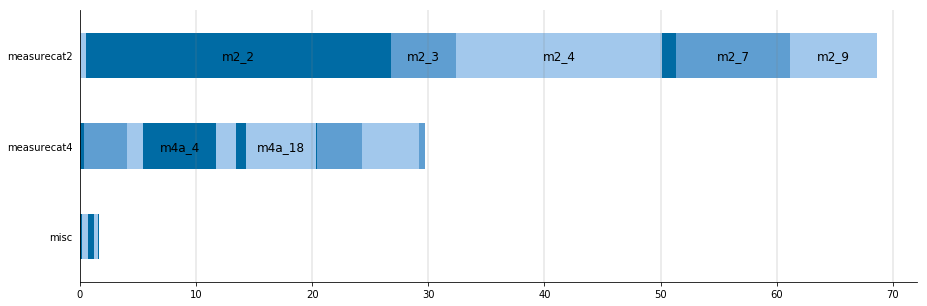

In [18]:
# Plotting the data
colours = ['#006BA4', '#5F9ED1', '#A2C8EC']
ax = measuresums_nonnull_share.groupby(['measurecat', measuresums_nonnull_share.index]).sum().unstack().plot(kind='barh', stacked=True, figsize=(15,5), legend=None, color=colours)
ax.tick_params(axis='both', which='both', bottom=True, top=False, labelbottom=True, left=False, right=False, labelleft=True)
ax.yaxis.set_label_text('')
ax.xaxis.grid(True, color='grey', linewidth=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()

# Adding labels
listlabels = ['m2_2', 'm2_3', 'm2_4', 'm2_7', 'm2_9', 'm4a_4', 'm4a_18']
i = 0
for rect in ax.patches:
    x = rect.get_x() + (rect.get_width() / 2)
    y = rect.get_y() + 0.3
    if rect.get_width() > 5:
        ax.text(x, y, listlabels[i], ha='center', fontsize=12)
        i += 1

We have the answer to our first question. The first four measures belong to type II, meaning they are direct payments "[*granted directly to farmers*](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=celex:32013R1307)" (art. 1 of Regulation (EU) No 1307/2013). They represent approximately 60% of the total CAP funding for Poland. Among them, measures II.2 and II.4 are so-called decoupled payments, that is not conditional on production. They account for 44% of the total enveloppe.

As we read in the European Commission's description of measures mentioned earlier, type II.2 payments are "*paid for eligible hectares declared by a farmer.*" The Polish Agency for Restructuring and Modernisation of Agriculture (ARiMR), responsible for managing the funds, precises that in 2018, for every hectare of farming land, the corresponding payment was [459.19 PLN per hectare](https://www.arimr.gov.pl/pomoc-unijna/platnosci-bezposrednie/platnosci-bezposrednie-w-roku-2018/stawki-platnosci-2018.html).

In addition, beneficiaries of type II.2 payments could expect to have access to type II.V payments for "*greening*", providing that they observe "*agricultural practices beneficial for the climate and the environment*", namely "*crop diversification, maintaining existing permanent grassland and having ecological focus area on the agricultural area*". In 2018, the rate for this activity amounted to 308.18 PLN per hectare. It is worth noticing that crop diversification and ecological focus are mandatory only when the arable land of the farmer exceeds 10 hectares. Therefore, in practice, the only real condition for smaller holdings is to maintain grasslands. We will come back to this point when we will look at the distribution of payments among beneficiaries.

Type II.7 is the only measure linked to production (9.8% of the total) while Type II.9 is a small farmers scheme that Member States can, but don't have to establish. The requirements are none, as we read that "*the objective of that scheme should be to support the existing agricultural structure of small farms in the Union without countering the development towards more competitive structures. For that reason, access to the scheme should, in principle, be limited to existing holdings.*" It is also capped to 1,250 EUR per year. In other words, it is more of a social than an agricultural measure, nevertheless it consumes 7.5% of the CAP budget for Poland.

Type IV/A measures have a different legal basis and serve a different object: rural development. For example, type IV/A.18 "*gives support to beneficiaries who suffer from particular constraints due to their location in mountain areas or other areas facing significant natural constraints or specific constraints*" while type type IV/A.4 has a very large objective of "*improving the economic and environmental performance of agricultural holdings and rural enterprises, improving the efficiency of the agricultural products marketing and processing sector, providing infrastructure needed for the development of agriculture and forestry and supporting non-remunerative investments necessary to achieve environmental aims.*" Without reconnecting these payments with their beneficiairies, it is difficult to figure out what kind of investiment they facilitate.

For the last remarks, we can also underline the very small share of payments aiming at "*supporting the conversion to and/or the maintenance of organic farming practices and methods*" (type IV/A.16 - 1.38%) and the absence of payments made under type IV/A.19 to "*carry out operations of one or more animal welfare commitments*".

If conversion to EUR is necessary, we suggest to use the rate provided by ARiMR, that is 4,2774 PLN for 1 EUR.

### c) distribution of payments between beneficiairies

In [19]:
# We can delete empty columns to free some memory
dataset.drop(measuresums_null, inplace=True, axis=1)
dataset.head() # check if everything is ok

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_9,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum
0,Małe gospodarstwo,1,NaN,ORŁY,37-716,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1457.80
1,Małe gospodarstwo,100007,NaN,ŁĄCKO,33-390,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,549.00,0.00,0.00,0.00,0.00,1490.01
2,Małe gospodarstwo,100047,NaN,GOSTYNIN,09-500,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1426.94
3,Małe gospodarstwo,100059,NaN,ŚWIDNICA,58-112,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1480.94
4,Małe gospodarstwo,100063,NaN,ANDRESPOL,95-020,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1457.80


In [20]:
# We inspect the 10 largest and smallest beneficiaries to have an idea of the range
display('10 largest beneficiaries:', dataset.nlargest(10, 'sum'))
display('10 smallest beneficiaries:', dataset.nsmallest(10, 'sum'))

'10 largest beneficiaries:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_9,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum
234780,NaN,NaN,MINISTERSTWO ROLNICTWA I ROZWOJU WSI,WARSZAWA,00-930,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,55358650.53,0.00,0.00,55358650.53
234781,NaN,NaN,AGENCJA RESTRUKTURYZACJI I MODERNIZACJI ROLNICTWA,WARSZAWA,00-175,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,51923651.57,0.00,0.00,51923651.57
234782,NaN,NaN,"SEBEX SP, Z O,O, SP, K,",WARSZAWA,02-281,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7867479.05
231135,NaN,NaN,GRUPA RYLEX SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALN...,BŁĘDÓW,05-620,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7566697.35
232751,NaN,NaN,SAMORZĄD WOJEWÓDZTWA LUBELSKIEGO,LUBLIN,20-074,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7560622.91,0.00,0.00,7560622.91
234783,NaN,NaN,KRAJOWA STACJA CHEMICZNO-ROLNICZA,WARSZAWA,05-075,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,7184596.54,0.00,0.00,7184596.54
232225,NaN,NaN,SAMORZĄD WOJEWÓDZTWA ŚLĄSKIEGO,KATOWICE,40-037,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,6342397.18,0.00,0.00,6342397.18
231013,NaN,NaN,RAJPOL SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,BELSK DUŻY,05-622,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6297156.32
233978,NaN,NaN,SAMORZĄD WOJEWÓDZTWA PODKARPACKIEGO,RZESZÓW,35-010,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,6236878.76,0.00,0.00,6236878.76
232275,NaN,NaN,SAMORZĄD WOJEWÓDZTWA ŚWIĘTOKRZYSKIEGO,KIELCE,25-516,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,5955267.23,0.00,0.00,5955267.23


'10 smallest beneficiaries:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_9,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum
829137,PIOTR,ADAMIAK,NaN,BUCZEK,98-113,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829138,MAŁGORZATA,ADAMOWICZ,NaN,BŁĘDÓW,05-620,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829141,MAREK,ALANKIEWICZ,NaN,MOSINA,61-160,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829142,WALERIAN,ALBIN,NaN,LUBASZ,64-720,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829143,ZBIGNIEW,ANDRZEJCZAK,NaN,BŁASZKI,98-235,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829144,MARIANNA,ANIELAK,NaN,DASZYNA,99-107,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829145,WANDA,ANIOŁKOWSKA,NaN,NIEPORĘT,05-126,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829147,JAN,ARAST,NaN,CZARNA,39-217,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829158,WOJCIECH,BALCER,NaN,UCHANIE,22-510,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
829159,ALICJA,BALIK,NaN,ŁOWICZ,99-400,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Among the largest beneficiaries, the two first positions are occupied by the ministry of Agriculture and the public managing agency ARiMR. Each of them received over 50 million PLN under the measure IV/A.25 for "*technical assistance*" (administrative costs). We will exclude them from the distribution. We also see some other public authorities like regions (voivodships), but their payments are not completely out of scale in comparison with payments received by private companies. If necessary, we will refine later the distribution after having classified the beneficiaries and got a clearer idea of the share of public authorities on the list.

Regarding the smallest beneficiaries, there are null values which might be explained by administrative errors. As we have seen before, the smallest amount that a potential beneficiary can claim is 459.19 PLN. Lower values are suspect.

In [21]:
# Display rows with sum below 400
dataset[dataset['sum'] < 400]

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_9,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum
802462,Małe gospodarstwo,104057,NaN,RADYMNO,37-552,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,334.55
802743,Małe gospodarstwo,110750,NaN,NAROL,37-610,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,377.92
803073,Małe gospodarstwo,117931,NaN,KRASOCIN,29-105,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,362.43
803115,Małe gospodarstwo,118665,NaN,KRASOCIN,29-105,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,390.31
803478,Małe gospodarstwo,127902,NaN,ZAGNAŃSK,26-050,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,346.94
803745,Małe gospodarstwo,133988,NaN,LISZKI,32-060,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,377.49
803777,Małe gospodarstwo,134883,NaN,PABIANICE,95-200,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,394.65
804377,Małe gospodarstwo,14838,NaN,LUBENIA,36-041,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,346.94
804646,Małe gospodarstwo,154216,NaN,MORĄG,14-300,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,339.52
804686,Małe gospodarstwo,154934,NaN,TORUŃ,87-100,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,9.24,0.00,0.00,0.00,0.00,356.84


The list contains 2194 rows. There are a lot of payment amounts around 300 PLN that are probably genuine, so to make sure we don't exclude them from the analysis, we set the threshold at 100 PLN. Beneficiaries who received payments below this amount won't be taken into account. In any case, they represent a very small share of the total number of beneficiaries.

In [22]:
# We create a new dataframe with sum between 100 and 10000000
dataset_filtered = dataset[dataset['sum'].between(100,10000000)]
print('Number of beneficiairies in our range:', len(dataset_filtered))
print('Total amount of payments in our range:', dataset_filtered['sum'].sum())

Number of beneficiairies in our range: 1359917
Total amount of payments in our range: 20987403904.359985


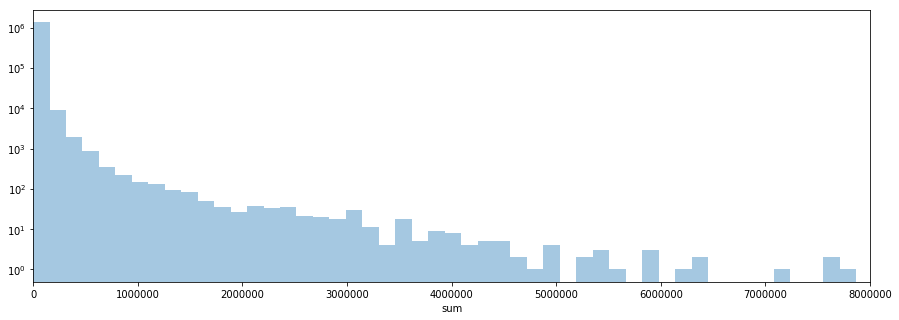

In [23]:
# Creating a histogram to see the distribution of sums
plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
g = sns.distplot(dataset_filtered['sum'], kde=False, bins=None)
g.set_xlim(0, 8000000)
g.set_yscale('log') # sets a logarithmic scale because of the very high amplitude of sums
g.tick_params(which='minor', left=False)

In [24]:
# Calculating the distribution of payments
print('Lowest value of payments:', dataset_filtered['sum'].min())
print('Highest value of payments:', dataset_filtered['sum'].max())
print('Median value of payments:', dataset_filtered['sum'].median())
distribution = dataset_filtered['sum'].groupby(pd.qcut(dataset_filtered['sum'], 10)).sum()
print('Distribution of payments broken down by decile:', distribution)

Lowest value of payments: 100.12
Highest value of payments: 7867479.05
Median value of payments: 5116.92
Distribution of payments broken down by decile: sum
(100.119, 1303.53]          142307494.29
(1303.53, 1860.168]         212683757.47
(1860.168, 2588.31]         299785800.01
(2588.31, 3640.1]           419257730.91
(3640.1, 5116.92]           589488763.64
(5116.92, 7252.16]          828946473.51
(7252.16, 10683.63]        1200217380.75
(10683.63, 16883.386]      1825596105.07
(16883.386, 31930.404]     3146756439.75
(31930.404, 7867479.05]   12322363958.96
Name: sum, dtype: float64


The high amplitude of payment amounts showed by the histogram is confirmed by the calculation of deciles. The median payment amounts to 5,116.92 PLN, far below the largest payment (7,867,479.05 PLN). 70% of the beneficiaries received less than 10,683.63 PLN while only 20% of payments were higher than 16,883.38 PLN.

                                  sums  share
sum                                          
(100.119, 1303.53]        142307494.29   0.68
(1303.53, 1860.168]       212683757.47   1.01
(1860.168, 2588.31]       299785800.01   1.43
(2588.31, 3640.1]         419257730.91   2.00
(3640.1, 5116.92]         589488763.64   2.81
(5116.92, 7252.16]        828946473.51   3.95
(7252.16, 10683.63]      1200217380.75   5.72
(10683.63, 16883.386]    1825596105.07   8.70
(16883.386, 31930.404]   3146756439.75  14.99
(31930.404, 7867479.05] 12322363958.96  58.71


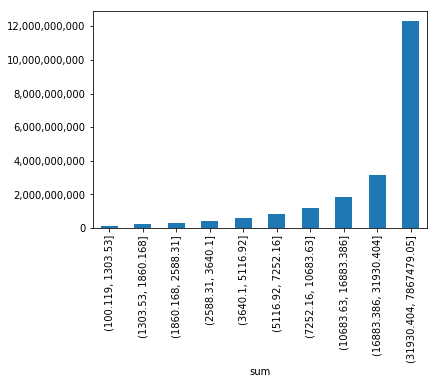

In [25]:
# Calculating the share of each decile in the grand total of disbursements
distribution = distribution.to_frame(name='sums')
distribution['share'] = distribution['sums'] / dataset_filtered['sum'].sum() * 100
print(distribution)

import matplotlib.ticker as tkr
ax = distribution['sums'].plot.bar()
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))

On the other hand, the top 20% of payments accounts for over 70% of the total amount of CAP disbursements. If we look at the top 30%, their share in the total amount of disbursements even exceeds 80%, revealing a very unequal distribution of payments in favour of the biggest beneficiaries. These observations answer our second question.

### d) Who are the largest beneficiaries of the CAP?

Finding out who are the largest individual beneficiaries of the CAP is fairly easy and we have already displayed the top 10 list above. This doesn't say a lot however about the profile of other beneficiaries: are they mostly individual farmers? limited companies? public authorities? nonprofit organisations? In order to answer this question, we first need to categorise beneficiaries and then see their respective share both in the total number of beneficiaries and the total amount of payments.

Categorisation will be based on the content of three columns: firstname, familyname and legalname. All beneficiaries named by their first and family name will be considered as private individuals, though we should keep in mind that we cannot deduce from the data whether they are non-farming landowners or "genuine" farmers. The same goes for anonymised small recipients ("Małe gospodarstwo"), unless they have a legal name.

Regarding legal persons, categorisation cannot but rely on prior general knowledge about land ownership in Poland, therefore the choice of categories is subjective:
- public authorities (regions, municipalities and their emanations when it is obvious)
- State Forests
- private limited companies
- agricultural cooperatives
- hunting, fishing and beekeeping organisations
- organisations connected with the Roman Catholic Church
- other religious organisations
- firefighting organisations
- other nonprofit organisations

We will apply filters from the most general to the most specific categories to "catch" beneficiaries with the most precise net.

In [31]:
dataset_filtered = dataset_filtered.assign(category = 'misc')
dataset_filtered.loc[dataset_filtered['legalname'].isnull(), 'category'] = 'individuals'

dataset_filtered.loc[dataset_filtered['legalname'].str.contains('FUNDACJA|STOWARZYSZENIE', na=False), 'category'] = 'nonprofit' # foundations and associations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('SPÓŁDZIELNIA|SPÓLDZIELNIA|SPÓŁDZIELCZ', na=False), 'category'] = 'agricoop' # agricultural cooperatives
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('SPÓŁKA|SPÓLKA|SPÓŁA|PRZEDSIĘBIORSTWO|FIRMA|PPHU|FHU', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('S,C,', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('SP, Z', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('SP Z', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('SP,Z', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('SP,J', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('S,A', na=False), 'category'] = 'business' # private companies
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('ZRZESZENIE PRODUCENTÓW', na=False), 'category'] = 'business' # producers' associations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('ZRZESZENIE BRANŻOWE PRODUCENTÓW', na=False), 'category'] = 'business' # producers' associations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('GRUPA PRODUCENTÓW ROLNYCH', na=False), 'category'] = 'business' # producers' associations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('KOŚCIÓŁ|PARAFIA', na=False), 'category'] = 'religious' # churches and parishes
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('KATOLICK|RZYM|ZGROMADZENIE|KLASZTOR|ZAKON|REKOLEK|ARCHIDIEC|SEMINARIUM|CARITAS', na=False), 'category'] = 'catholic' # Catholic Church
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('GRECK', na=False), 'category'] = 'religious' # Greek Catholic Church
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('WOJEWÓDZTWA', na=False), 'category'] = 'governmental' # regions
dataset_filtered.loc[dataset_filtered['legalname'].str.startswith('POWIAT', na=False), 'category'] = 'governmental' # districts
dataset_filtered.loc[dataset_filtered['legalname'].str.startswith('GMINA', na=False), 'category'] = 'governmental' # municipalities
dataset_filtered.loc[dataset_filtered['legalname'].str.startswith('MIASTO', na=False), 'category'] = 'governmental' # municipalities
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('NADLEŚNICTWO', na=False), 'category'] = 'stateforests' # State Forests
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('WĘDKAR', na=False), 'category'] = 'huntingetc' # fishing organisations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('PSZCZELARZY', na=False), 'category'] = 'huntingetc' # beekeeping organisations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('KOŁO ŁOWIEC', na=False), 'category'] = 'huntingetc' # hunting organisations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('KOLO ŁOWIEC', na=False), 'category'] = 'huntingetc' # hunting organisations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('ŁOWIECTWA|MYŚLIWS', na=False), 'category'] = 'huntingetc' # hunting organisations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('ZWIĄZEK ŁOWIECKI', na=False), 'category'] = 'huntingetc' # hunting organisations
dataset_filtered.loc[dataset_filtered['legalname'].str.contains('POŻARN', na=False), 'category'] = 'firefighting' # firefighting organisations

dataset_filtered.loc[[234787, 234800, 231986, 234807, 234808, 1027680, 234794, 234803, 235150, 231985], 'category'] = 'business' # business associations
dataset_filtered.loc[[5155, 200838, 184393, 231243, 232505, 264670, 449452, 449500, 449545, 449701, 449715, 536485, 552979, 597843, 705423, 705454, 705566, 706500, 829058, 881633, 968903, 1015137, 1015140, 1015279, 1044300, 1112331, 1133871, 1200770, 1222385, 231156, 231883, 232283, 232574, 232765, 233271, 233281, 233766, 233875, 233991, 234220, 234467, 234508, 234489, 234635, 234786, 234792, 234891, 235164, 235264, 264538, 264635, 264772, 264788, 329726, 449587, 469737, 685240, 797570, 818061, 829052, 1112319, 1180238, 231481, 232652, 232736, 232799, 234009, 234213, 272838, 628833, 1015154, 1015125, 1133818, 231727], 'category'] = 'business' # other private companies
dataset_filtered.loc[[597819, 264711, 536446, 179847, 806424, 846122, 1056691, 1015280, 1231691, 1348225, 1359374, 173944, 173945, 173956, 173968, 232112, 232233, 232615, 232616, 233011, 308362, 308365, 397474, 397511, 422363, 449473, 449785, 449819, 449855, 449885, 449886, 449982, 449984, 450023, 450042, 450064, 536322, 536436, 536519, 541918, 608684, 632736, 672319, 672442, 672459, 705412, 914866, 914888, 915022, 996109, 996164, 1043939, 1112292, 1133802, 1133896], 'category'] = 'misc' # miscellaneous
dataset_filtered.loc[[29770, 231068, 231695, 231848, 234790, 743588, 743665], 'category'] = 'nonprofit' # other nonprofits
dataset_filtered.loc[[817285, 968824, 469633, 851402, 797548, 597903], 'category'] = 'huntingetc' # other hunting and beekeeping organisations
dataset_filtered.loc[[3691, 35156, 52733, 71562, 118286, 131140, 173929, 201278, 211473, 266413, 270404, 308322, 313701, 372967, 397536, 422423, 469639, 469676, 497850, 536486, 554758, 568839, 599857, 638049, 672344, 743617, 797586, 797622, 843329, 914881, 914917, 914974, 944768, 944801, 944804, 968786, 996096, 1030770, 1033025, 1035313, 1068253, 1091748, 1112261, 1149137, 1172161, 1180211, 1184030, 1194128, 1316390, 1343127, 1353237, 36149, 6069, 147946, 233006, 264522, 264560, 264637, 536496, 560835, 680801, 743649, 1043940, 1091754, 232164, 264712, 397502, 705508, 881652, 1316126, 268679, 449501], 'category'] = 'catholic' # other Catholic parishes and organisations
dataset_filtered.loc[[287023, 308334, 449505, 685176, 154736, 264581, 422407, 743761, 797554], 'category'] = 'religious' # other religious, non-Catholic organisations
dataset_filtered.loc[[234785, 234791, 234820, 173979], 'category'] = 'governmental' # other governmental entities
dataset_filtered.loc[536323, 'category'] = 'stateforests' # State Forests
dataset_filtered.loc[[449901, 234264, 234281], 'category'] = 'agricoop' # other agricultural cooperatives

In [32]:
# Calculating the share of each category of beneficiaries in the total number of beneficiaries
benefcat = dataset_filtered['category'].value_counts()
benefcat = benefcat.to_frame(name='population')
benefcat['share'] = benefcat['population'] / benefcat['population'].sum() * 100
display(benefcat)

,population,share
individuals,1348966,99.19
business,3842,0.28
catholic,1765,0.13
huntingetc,1561,0.11
governmental,978,0.07
agricoop,938,0.07
misc,809,0.06
nonprofit,507,0.04
stateforests,284,0.02
firefighting,161,0.01


In [28]:
# Calculating the share of each category of beneficiaries in the total amount of disbursements
paymentsbycat = dataset_filtered.groupby(['category']).sum()
paymentsbycat['share'] = paymentsbycat['sum'] / paymentsbycat['sum'].sum() * 100
display(paymentsbycat[['sum', 'share']])

,sum,share
category,,
agricoop,245690869.12,1.17
business,1222520165.06,5.83
catholic,25048239.79,0.12
firefighting,8771011.15,0.04
governmental,1140391928.69,5.43
huntingetc,40539450.42,0.19
individuals,18129285660.70,86.38
misc,104960090.66,0.50
nonprofit,46120741.82,0.22


Although individuals represent over 99% of the total number of beneficiaries, they receive "only" 86.4% of CAP funding. By contrast, the business sector got 5.8% of funding with only 0.28% of the population of beneficiaries. Leaving aside governmental entities, other categories represent a very small share of both beneficiaries and funding, though amounts are significant in absolute terms: over 40 million PLN for hunting, fishing and beekeeping organisations, 25 million PLN for entities connected with the Roman Catholic Church and 22 million PLN for the State Forests.

Let's now have a look at the largest beneficiaries in selected categories.

In [29]:
display('Top 10 individual beneficiaries:')
display(dataset_filtered[dataset_filtered['category'] == 'individuals'].sort_values(by='sum', ascending=False).head(10))

display('Top 10 beneficiaries in the business sector:')
display(dataset_filtered[dataset_filtered['category'] == 'business'].sort_values(by='sum', ascending=False).head(10))

display('Top 10 beneficiaries among Catholic organisations:')
display(dataset_filtered[dataset_filtered['category'] == 'catholic'].sort_values(by='sum', ascending=False).head(10))

display('Top 10 beneficiaries among hunting, fishing and beekeeping organisations:')
display(dataset_filtered[dataset_filtered['category'] == 'huntingetc'].sort_values(by='sum', ascending=False).head(10))

display('Top 10 beneficiaries among nonprofit organisations:')
display(dataset_filtered[dataset_filtered['category'] == 'nonprofit'].sort_values(by='sum', ascending=False).head(10))

display('Top 10 beneficiaries among miscellaneous organisations:')
display(dataset_filtered[dataset_filtered['category'] == 'misc'].sort_values(by='sum', ascending=False).head(10))

'Top 10 individual beneficiaries:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum,category
227741,PAWEŁ,SZEMETIUK,NaN,RUTKI,18-312,0.00,0.00,1724274.59,9316.46,1243492.69,...,0.00,1921855.73,0.00,107693.05,0.00,0.00,0.00,0.00,5019683.11,individuals
217459,BEATA,JURECKA,NaN,KOŃSKOWOLA,24-130,0.00,0.00,3323.16,743.48,2230.34,...,0.00,0.00,0.00,1288.80,0.00,0.00,0.00,0.00,3777963.38,individuals
225957,WIESŁAW,SAPIŁO,NaN,ZAMOŚĆ,22-400,0.00,0.00,290521.26,4714.28,194983.79,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3523439.70,individuals
217940,RAFAŁ,KARP,NaN,LUBOCHNIA,97-217,0.00,0.00,4398.57,1155.94,2952.11,...,0.00,0.00,0.00,1705.87,0.00,0.00,0.00,0.00,3010212.49,individuals
215115,HALINA,FRANCZAK,NaN,PAJĘCZNO,98-330,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3000000.00,individuals
225774,ADAM,RYTEL,NaN,ZAŁUSKI,09-142,0.00,0.00,18782.17,4728.84,12605.69,...,0.00,0.00,0.00,1951.10,0.00,0.00,0.00,0.00,2969350.94,individuals
217651,JAN,KALBARCZYK,NaN,GÓRA KALWARIA,05-532,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2910975.00,individuals
221659,OLIWIA,MATKOWSKA,NaN,SŁOŃSK,66-436,0.00,0.00,575934.58,4713.76,386539.39,...,0.00,1733378.80,0.00,7831.25,0.00,0.00,0.00,0.00,2745221.61,individuals
227196,ANDRZEJ,STĘPIEŃ,NaN,SŁUPIA KONECKA,26-234,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2278500.66,individuals
229255,TOMASZ,WEJMAN,NaN,KOŃSKOWOLA,24-130,0.00,0.00,3023.15,628.42,2028.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2258421.34,individuals


'Top 10 beneficiaries in the business sector:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum,category
234782,NaN,NaN,"SEBEX SP, Z O,O, SP, K,",WARSZAWA,02-281,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7867479.05,business
231135,NaN,NaN,GRUPA RYLEX SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALN...,BŁĘDÓW,05-620,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7566697.35,business
231013,NaN,NaN,RAJPOL SPÓŁKA Z OGRANICZONĄ ODPOWIEDZIALNOŚCIĄ,BELSK DUŻY,05-622,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6297156.32,business
231474,NaN,NaN,"TOP FARMS WIELKOPOLSKA SP, Z O, O,",CZEMPIŃ,64-020,0.00,0.00,582480.18,4713.25,3014128.32,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5653216.86,business
231770,NaN,NaN,"TOP FARMS ""GŁUBCZYCE"" SPÓŁKA Z O,O,",GŁUBCZYCE,48-100,0.00,0.00,574063.27,4713.25,3349526.76,...,0.00,0.00,0.00,11550.00,0.00,0.00,0.00,0.00,5505446.41,business
232285,NaN,NaN,"KOMBINAT ROLNY KIETRZ SP, Z O,O,",KIETRZ,48-130,0.00,0.00,589931.50,4713.26,2663887.72,...,0.00,116550.00,0.00,40000.00,0.00,0.00,0.00,0.00,5458368.59,business
234203,NaN,NaN,"""WILGA FRUIT"" SP, Z O,O,",SOBIENIE-JEZIORY,08-443,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5370846.87,business
233462,NaN,NaN,ANDERSEN POLAND SPÓŁKA Z OGRANICZONĄ ODPOWIEDZ...,OŚWIĘCIM,32-600,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5197813.07,business
234784,NaN,NaN,"HOOGWEGT POLAND SP, Z O,O,",WARSZAWA,01-748,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5024516.54,business
234786,NaN,NaN,AGMAR DORADZTWO WPR MAŁGORZATA JAWORSKA-DUSZYK,WARSZAWA,04-844,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4463774.43,business


'Top 10 beneficiaries among Catholic organisations:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum,category
233794,NaN,NaN,GOSPODARSTWO ARCHIDIECEZJI SZCZECIŃSKO - KAMIE...,PYRZYCE,74-200,0.00,0.00,170667.18,4714.01,114543.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,699993.73,catholic
231801,NaN,NaN,GOSPODARSTWO ROLNE BRACISZEWO ARCHIDIECEZJI GN...,GNIEZNO,62-200,0.00,0.00,308930.49,4714.27,207339.17,...,0.00,0.00,0.00,7831.25,0.00,0.00,0.00,0.00,538771.95,catholic
233098,NaN,NaN,GOSPODARSTWO ROLNE KWIECISZEWO ARCHIDIECEZJI G...,MOGILNO,88-321,0.00,0.00,286172.80,4714.27,192065.32,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,530141.98,catholic
234865,NaN,NaN,"STOWARZYSZENIE ""LOKALNA GRUPA DZIAŁANIA - PRZY...",WARTA,98-290,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,316426.50,0.00,0.00,0.00,316426.50,catholic
232071,NaN,NaN,PARAFIA RZYMSKO-KATOLICKA MATKI BOŻEJ KRÓLOWEJ...,JABŁONNA,05-110,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,296931.00,0.00,0.00,0.00,296931.00,catholic
232702,NaN,NaN,"PARAFIA RZYMSKOKATOLICKA P,W, WSZYSTKICH ŚWIĘTYCH",LINIEWO,83-421,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,296210.00,0.00,0.00,0.00,296210.00,catholic
233102,NaN,NaN,"PARAFIA RZYMSKO-KATOLICKA P,W, ŚW, AP, PIOTRA ...",MOGILNO,88-342,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,294921.00,0.00,0.00,0.00,294921.00,catholic
234209,NaN,NaN,"RZYMSKOKATOLICKA PARAFIA P,W, ŚW, MARII MAGDALENY",SOBKÓW,28-305,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,261938.39,0.00,0.00,0.00,261938.39,catholic
232406,NaN,NaN,"PARAFIA KATOLICKA P,W,ŚW WALENTEGO KM W KONOPI...",KONOPISKA,42-274,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,249980.00,0.00,0.00,0.00,249980.00,catholic
232164,NaN,NaN,"OPACTWO O,O, CYSTERSÓW",JODŁOWNIK,34-623,0.00,0.00,70521.38,4717.25,47330.53,...,0.00,92060.00,0.00,11550.00,0.00,0.00,0.00,0.00,244221.10,catholic


'Top 10 beneficiaries among hunting, fishing and beekeeping organisations:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum,category
234639,NaN,NaN,ROZTOCZAŃSKI ZWIĄZEK PSZCZELARZY W TOMASZOWIE ...,TOMASZÓW LUBELSKI,22-600,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,608254.47,huntingetc
232753,NaN,NaN,WOJEWÓDZKI ZWIĄZEK PSZCZELARZY W LUBLINIE,LUBLIN,20-027,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,573732.66,huntingetc
233980,NaN,NaN,WOJEWÓDZKI ZWIĄZEK PSZCZELARZY W RZESZOWIE,RZESZÓW,35-065,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,552511.25,huntingetc
233351,NaN,NaN,WOJEWÓDZKI ZWIĄZEK PSZCZELARZY W OLSZTYNIE,OLSZTYN,10-502,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,521526.46,huntingetc
232437,NaN,NaN,"KOŁO ŁOWIECKIE ""ORĘŻ"" GOSPODARSTWO ROLNO - ŁOW...",KOSZALIN,75-901,0.00,0.00,189272.50,4714.81,127030.54,...,0.00,98808.19,0.00,7831.25,0.00,0.00,0.00,0.00,459128.54,huntingetc
232518,NaN,NaN,WOJEWÓDZKI ZWIĄZEK PSZCZELARZY W KRAKOWIE,KRAKÓW,31-011,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,442006.96,huntingetc
235053,NaN,NaN,DOLNOŚLĄSKI ZWIĄZEK PSZCZELARZY,WROCŁAW,50-413,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,409558.79,huntingetc
232227,NaN,NaN,ŚLĄSKI ZWIĄZEK PSZCZELARZY W KATOWICACH,KATOWICE,40-006,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,400225.03,huntingetc
231728,NaN,NaN,WOJEWÓDZKI ZWIĄZEK PSZCZELARZY,GDAŃSK,80-874,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,395773.52,huntingetc
232280,NaN,NaN,ŚWIĘTOKRZYSKI ZWIĄZEK PSZCZELARZY W KIELCACH,KIELCE,25-338,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,395224.78,huntingetc


'Top 10 beneficiaries among nonprofit organisations:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum,category
234790,NaN,NaN,FUNDACJA FAPA POLSKA IZBA BANKOWOŚCI SPÓŁDZIEL...,WARSZAWA,02-304,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2647125.02,0.00,0.00,2647125.02,nonprofit
234806,NaN,NaN,FUNDACJA PROGRAMÓW POMOCY DLA ROLNICTWA FAPA,WARSZAWA,00-930,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,912892.40,0.00,0.00,912892.40,nonprofit
234118,NaN,NaN,"STOWARZYSZENIE LOKALNA GRUPA DZIAŁANIA ""RAZEM ...",SKARŻYSKO KOŚCIELNE,26-115,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,893412.96,0.00,0.00,0.00,893412.96,nonprofit
232159,NaN,NaN,"STOWARZYSZENIE LOKALNA GRUPA DZIAŁANIA ""ZIEMIA...",JĘDRZEJÓW,28-300,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,771068.68,0.00,0.00,0.00,771068.68,nonprofit
231848,NaN,NaN,PTAKI POLSKIE,GONIĄDZ,19-110,0.00,0.00,145938.93,4715.46,97947.14,...,0.00,340149.86,0.00,11550.00,0.00,0.00,0.00,0.00,603517.59,nonprofit
233912,NaN,NaN,FUNDACJA NA RZECZ OCHRONY PRZYRODY I KRAJOBRAZ...,RUCIANE-NIDA,12-220,0.00,0.00,128556.84,4715.76,86281.12,...,0.00,357925.20,0.00,7831.25,0.00,0.00,0.00,0.00,588137.10,nonprofit
233578,NaN,NaN,"STOWARZYSZENIE ""WSPÓLNIE DLA PRZYSZŁOŚCI""",PLESZEW,63-300,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,573072.00,0.00,0.00,0.00,573072.00,nonprofit
232830,NaN,NaN,STOWARZYSZENIE ROZWOJU WSI ŚWIĘTOKRZYSKIEJ,ŁAGÓW,26-025,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,526478.75,0.00,0.00,0.00,526478.75,nonprofit
232495,NaN,NaN,"STOWARZYSZENIE LOKALNA GRUPA DZIAŁANIA ""PUSZCZ...",KOZIENICE,26-900,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,503813.30,0.00,0.00,0.00,503813.30,nonprofit
234931,NaN,NaN,"STOWARZYSZENIE LOKALNA GRUPA DZIAŁANIA ""ZIEMIA...",WIELUŃ,98-300,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,501753.83,0.00,0.00,0.00,501753.83,nonprofit


'Top 10 beneficiaries among miscellaneous organisations:'

,firstname,familyname,legalname,municipality,postalcode,m1_2,m1_7,m2_2,m2_3,m2_4,...,m4a_14,m4a_15,m4a_16,m4a_18,m4a_24,m4a_25,m5b1_3,m6_b1,sum,category
234783,NaN,NaN,KRAJOWA STACJA CHEMICZNO-ROLNICZA,WARSZAWA,05-075,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,7184596.54,0.00,0.00,7184596.54,misc
232616,NaN,NaN,"ZAKŁAD GOSPODARKI KOMUNALNEJ W KURZĘTNIKU SP, ...",KURZĘTNIK,13-306,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2664105.09,misc
232383,NaN,NaN,MAGDALENA PIEKARZ GOSPODARSTWO ROLNE,KOŁBASKOWO,72-001,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2478629.01,misc
235084,NaN,NaN,HODOWLA ZWIERZĄT ZARODOWYCH OSOWA SIEŃ,WSCHOWA,67-400,0.00,0.00,621763.94,4713.37,1050255.22,...,0.00,172466.38,0.00,7831.25,0.00,0.00,0.00,0.00,2385706.50,misc
232585,NaN,NaN,INSTYTUT ZOOTECHNIKI PAŃSTWOWY INSTYTUT BADAWC...,KRZEMIENIEWO,64-122,0.00,0.00,633294.59,4713.53,550459.51,...,0.00,126505.57,0.00,7831.25,0.00,0.00,0.00,0.00,1643400.97,misc
231256,NaN,NaN,CENTRUM DORADZTWA ROLNICZEGO W BRWINOWIE,BRWINÓW,05-840,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1399147.39,0.00,0.00,1399147.39,misc
233038,NaN,NaN,POLSKA AKADEMIA NAUK ZAKŁAD DOŚWIADCZALNY AGRO...,MIKOŁAJKI,11-730,0.00,0.00,617729.55,4713.60,546395.79,...,0.00,138035.70,0.00,7831.25,0.00,0.00,0.00,0.00,1348108.60,misc
233348,NaN,NaN,UNIWERSYTET WARMIŃSKO-MAZURSKI W OLSZTYNIE,OLSZTYN,10-957,0.00,0.00,633200.97,4713.57,590442.68,...,0.00,0.00,0.00,7831.25,0.00,0.00,0.00,0.00,1276443.90,misc
232967,NaN,NaN,INSTYTUT HODOWLI I AKLIMATYZACJI ROŚLIN PAŃSTW...,MANOWO,76-009,0.00,0.00,636336.21,4713.67,446370.50,...,0.00,0.00,0.00,7831.25,0.00,0.00,0.00,0.00,1171346.09,misc
234552,NaN,NaN,STACJA DOŚWIADCZALNA OCENY ODMIAN W SŁUPI WIEL...,ŚRODA WIELKOPOLSKA,63-022,0.00,0.00,607698.69,4713.68,408446.78,...,0.00,0.00,0.00,9852.55,0.00,0.00,0.00,0.00,1169772.99,misc


Even if most individuals receive no more than a few thousand zlotys in payments, the largest beneficiaries actually get several millions, with a record of 5 million in the small village of Rutki, in north-eastern Poland.

Among private companies, the largest beneficiary is SEBEX, a distributor of dairy and food products eligible to CAP funding under a special measure to promote the consumption of milk, fruits and vegetables in schools. Also in the top 10, Andersen Poland benefits from the CAP under the same measure.

Under a different angle, we can notice a strong presence of foreign-owned companies like Top Farms (belonging to UK-based Spearhead International Ltd, itself owned by the USA-based equity firm Paine Schwartz Partners) and Hoogwegt, a Dutch group that has become "*the world’s largest privately owned dairy ingredient provider*".

In other categories, payments are less impressive but nevertheless significant. With respectively almost 700,000 and over 1 million PLN, the archdioceses of Szczecin-Kamień Pomorski and Gniezdo own extensive estates, as do some hunting and beekeeping associations.